# How to train the SOM
* Start with dataset composed of n_features independent variables
* Create a grid composed of nodes, each one having a weight vector of n_features elements
* Randomly initialize the values of weights vectors to small numbers close to 0
* Select one random observation point from the dataset
* Compute the euclidean distances from ths point to the different neurons in the network
* Select the neuron that has the minimum distance to the point. This neuron is called the winning node
* Update the weights of the winning node to move it closer to the point
* Using the gaussian neighbouring function of mean the winning node also update the weights of the winning node neighbors to move them closer to the point.  The neighborhood radius is sigma in the gaussian in the gaussian function.
* Repeat top 5 steps and update the weights after each observation (Reinforcement Learning) or after a batch of observations (Batch Learning) until the network converges to a point where the neighborhood stops decreasing.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

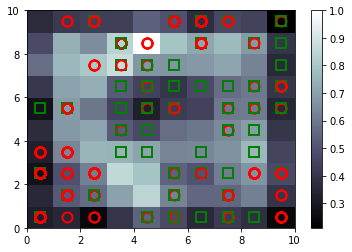

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [9]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,8)], mappings[(2,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [12]:
print(frauds)

[[1.5813718e+07 1.0000000e+00 4.2830000e+01 1.2500000e+00 2.0000000e+00
  7.0000000e+00 4.0000000e+00 1.3875000e+01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 3.5200000e+02 1.1300000e+02]
 [1.5815271e+07 1.0000000e+00 2.7580000e+01 3.2500000e+00 1.0000000e+00
  1.1000000e+01 8.0000000e+00 5.0850000e+00 0.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 3.6900000e+02 2.0000000e+00]
 [1.5805627e+07 1.0000000e+00 2.7830000e+01 1.5000000e+00 2.0000000e+00
  9.0000000e+00 4.0000000e+00 2.2500000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 4.0000000e+00]
 [1.5810716e+07 1.0000000e+00 2.3500000e+01 3.1650000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 4.1500000e-01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 8.1000000e+01]
 [1.5767264e+07 1.0000000e+00 7.4830000e+01 1.9000000e+01 1.0000000e+00
  1.0000000e+00 1.0000000e+00 4.0000000e-02 0.0000000e+00 1.